## Exploring the data

In [1]:
import jax.numpy as jnp
import matplotlib.pyplot as plt

from experiments.population_genetics.pop_gen_utility import split_data_into_time_batches, read_csv_data

In [2]:
data_csv_file = r"../data/samps_N1000_mu1e-04_m0.01.csv"
n_plot = 12

data = read_csv_data(data_csv_file)
print(f"Total data is {data.shape[0]}")

time_sliced_data = split_data_into_time_batches(data, time_slice=6)
print(f"Data shape after time slicing: {time_sliced_data.shape}")

hyperparams = time_sliced_data[:, :, :3]
prior_data = time_sliced_data[:, :, 3:]
print(f"Hyperparams data shape: {hyperparams.shape}")
print(f"Prior data shape: {prior_data.shape}")


Total data is 60000
Data shape after time slicing: (10000, 6, 1027)
Hyperparams data shape: (10000, 6, 3)
Prior data shape: (10000, 6, 1024)


In [3]:
prior_data = prior_data[:, -1, :]  # We take only the last image

In [4]:
print(f"Minimum value in the data {jnp.min(prior_data)}")
print(f"Maximum value in the data {jnp.max(prior_data)}")

Minimum value in the data 0.03799999877810478
Maximum value in the data 0.953000009059906


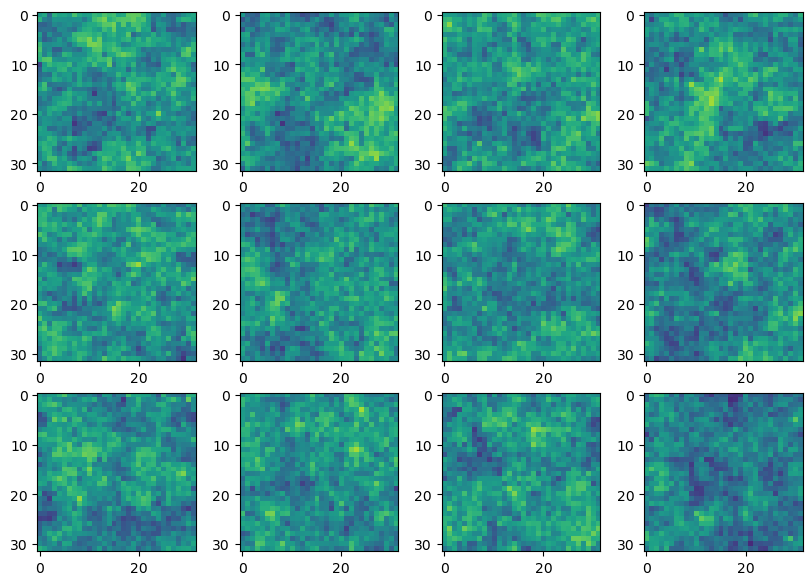

In [6]:
fig, axs = plt.subplots(3, 4, figsize=(10, 7))
for i, d in enumerate(prior_data[2000: 2000 + n_plot]):
    rows = int(i//4)
    cols = int(i%4)
    axs[rows][cols].imshow(d.reshape((32, 32)), vmin=0, vmax=1)


## Histogram of values 

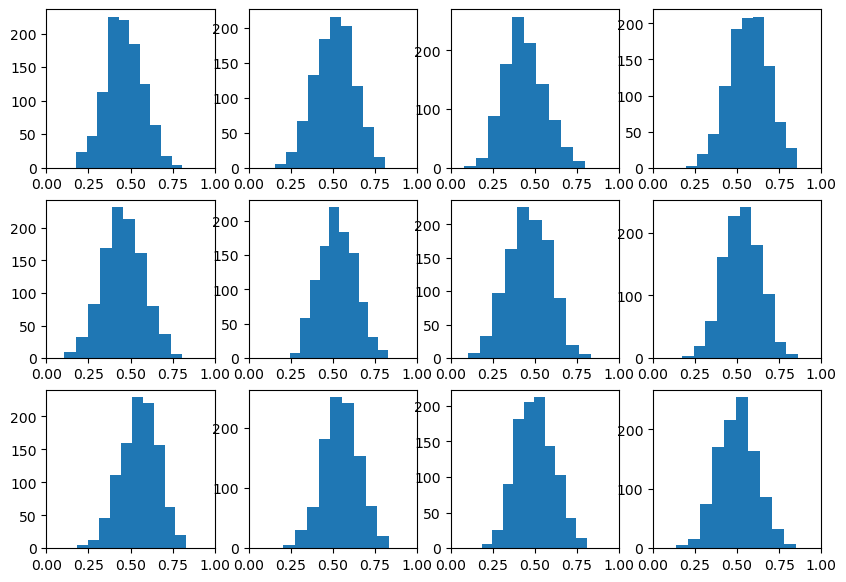

In [8]:
fig, axs = plt.subplots(3, 4, figsize=(10, 7))
for i, d in enumerate(prior_data[:n_plot]):
    rows = int(i//4)
    cols = int(i%4)
    axs[rows][cols].hist(d.reshape((-1,)))
    axs[rows][cols].set_xlim([0, 1])

## Pre-processing

In [14]:
data_mean = jnp.mean(prior_data, axis=0)[None, ...]
data_std = jnp.std(prior_data, axis=0)[None, ...]

In [16]:
prior_data_preprocessed = (prior_data - data_mean)/data_std

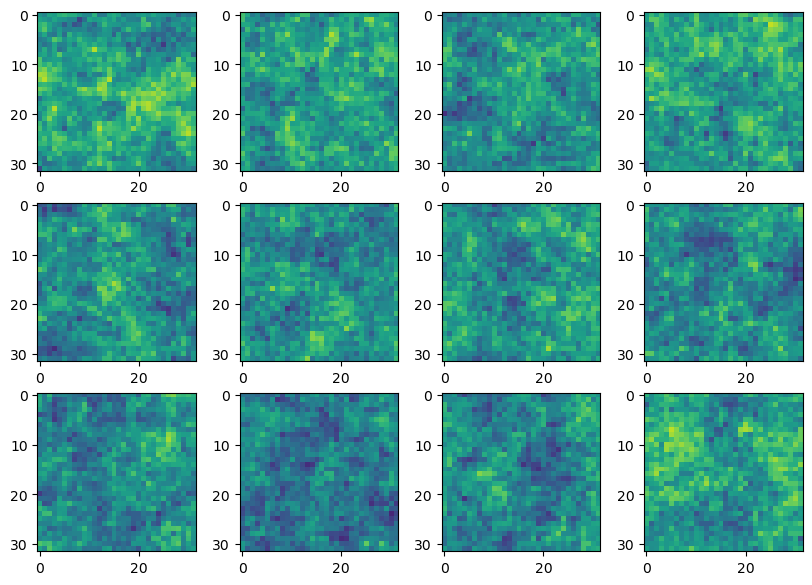

In [24]:
fig, axs = plt.subplots(3, 4, figsize=(10, 7))
for i, d in enumerate(prior_data_preprocessed[1000: 1000 + n_plot]):
    rows = int(i//4)
    cols = int(i%4)
    axs[rows][cols].imshow(d.reshape((32, 32)), vmin=-4, vmax=4)


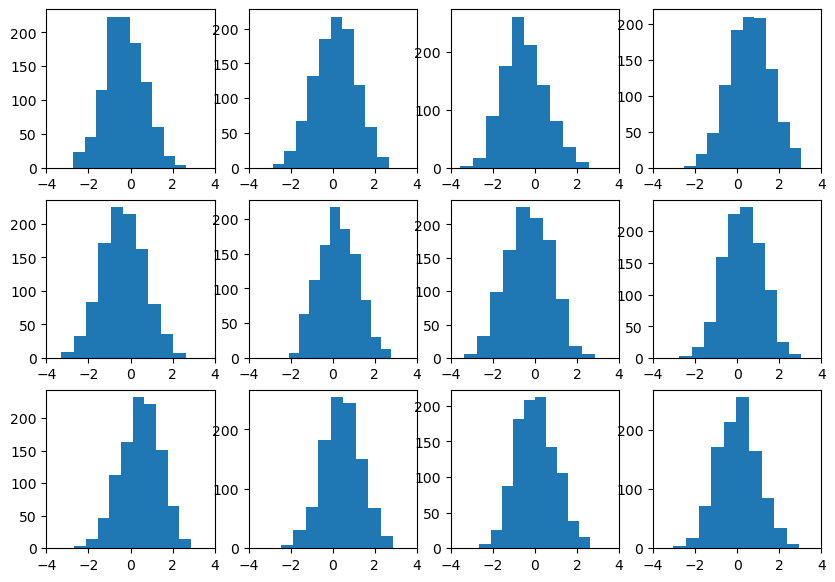

In [23]:
fig, axs = plt.subplots(3, 4, figsize=(10, 7))
for i, d in enumerate(prior_data_preprocessed[:n_plot]):
    rows = int(i//4)
    cols = int(i%4)
    axs[rows][cols].hist(d.reshape((-1,)))
    axs[rows][cols].set_xlim([-4, 4])

## Global histogram

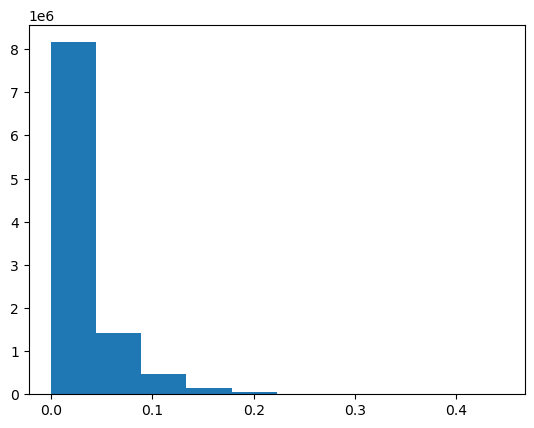

In [22]:
plt.hist(prior_data.reshape((-1,)))
# plt.xlim([0, 1])
plt.show()

## Mean Value

In [8]:
mean_prior_data = jnp.mean(prior_data, axis=0)

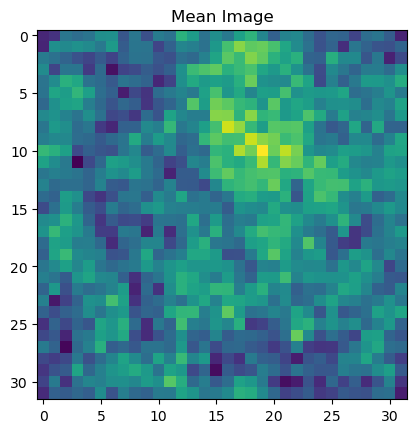

In [9]:
plt.imshow(mean_prior_data.reshape((32, 32)))
plt.title("Mean Image")
plt.show()

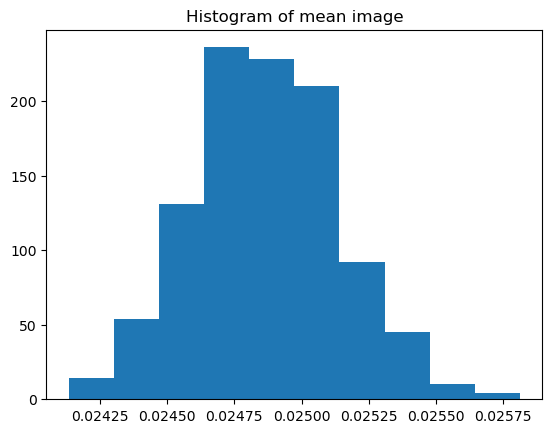

In [11]:
plt.hist(mean_prior_data)
plt.title("Histogram of mean image")
# plt.xlim([0.49, 0.501])
plt.show()

## Covariance

In [25]:
cov_image = jnp.cov(prior_data, rowvar=False)

In [26]:
cov_image.shape

(1024, 1024)

In [27]:
diag_cov_image = jnp.diag(cov_image)

In [28]:
jnp.min(cov_image), jnp.max(cov_image)

(Array(-0.00019978, dtype=float32), Array(0.0145303, dtype=float32))

In [29]:
jnp.min(diag_cov_image), jnp.max(diag_cov_image)

(Array(0.01346708, dtype=float32), Array(0.0145303, dtype=float32))